## **SKENARIO 1: Klasifikasi VBNN - Feature Selection**

## **IMPORT LIBRARY**

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score, classification_report, confusion_matrix, accuracy_score
import time
from scipy.spatial import Voronoi, voronoi_plot_2d
from sklearn.decomposition import PCA

import heapq
from scipy.spatial import Delaunay
from collections import defaultdict, Counter

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

## **DATA LOADING**

In [55]:
# Load dan read data
url_train = "https://drive.google.com/uc?export=download&id=1mwBc1Xbdp5vezgcQLi-BWcsaVNxiqblv"
url_test = "https://drive.google.com/uc?export=download&id=1nSQr83pGwZQ-ShLgrDWH0AoPEi3E5FgF"
url_label = "https://drive.google.com/uc?export=download&id=169-NXQYAKyntsfhcEjzWc0oNB4dD4DkQ"

df_train = pd.read_csv(url_train)
df_test = pd.read_csv(url_test)
df_label = pd.read_csv(url_label)

In [56]:
# Menggabungkan fitur train dan label 
print(f"Data Train Loaded\nDimension: {df_train.shape}")

Data Train Loaded
Dimension: (3817, 16)


## **FEATURE ENGINEERING**

### - **Split Data**

In [57]:
# Melakukan Split data
X_train_raw, X_val_raw, y_train, y_val = train_test_split(df_train, df_label, test_size=0.2, random_state=42, stratify=df_label)

print(f"Data Split Done. \nTrain Shape: {X_train_raw.shape}, Val Shape: {X_val_raw.shape}")

Data Split Done. 
Train Shape: (3053, 16), Val Shape: (764, 16)


In [58]:
# Mempersiapkan Data Testing
X_test_raw = df_test.drop(columns=['ID'])
print(f"Data Test Loaded\nDimension: {X_test_raw.shape}")

Data Test Loaded
Dimension: (3818, 16)


In [59]:
X_train_raw.head()

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
2329,1962,Doktor,Cerai,170435626.0,0.0,0.0,29.0,62713.0,925837.0,117753.0,151245.0,1.0,4.0,12.0,0.0,NaN
394,1973,Doktor,Rencana Menikah,171014909.0,0.0,0.0,79.0,189937.0,1166661.0,164325.0,84866.0,0.0,5.0,6.0,0.0,NaN
981,1951,Sarjana,Rencana Menikah,98962000.0,0.0,1.0,36.0,26299.0,159817.0,12138.0,24276.0,5.0,6.0,6.0,1.0,2013-01-14
1199,1966,Sarjana,Sendiri,93386407.0,0.0,1.0,38.0,10163.0,48697.0,10870.0,2632.0,4.0,NaN,4.0,0.0,NaN
3137,1959,Sarjana,Menikah,150100639.0,0.0,NaN,46.0,127193.0,307425.0,90571.0,44549.0,NaN,7.0,8.0,0.0,NaN


In [60]:
X_val_raw.head()

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
2464,1957,Sarjana,Sendiri,33742926.0,0.0,0.0,79.0,8109.0,25610.0,8792.0,5398.0,3.0,NaN,NaN,0.0,NaN
480,1976,Sarjana,Rencana Menikah,140988476.0,0.0,NaN,45.0,102826.0,804331.0,52446.0,44966.0,0.0,6.0,5.0,0.0,NaN
2368,1979,Sarjana,NaN,29604689.0,1.0,0.0,57.0,0.0,6331.0,16100.0,12090.0,1.0,0.0,0.0,0.0,NaN
3457,1977,Sarjana,Rencana Menikah,118810462.0,0.0,1.0,60.0,30193.0,172971.0,85239.0,72449.0,2.0,8.0,6.0,0.0,NaN
503,1972,Sarjana,Sendiri,129913133.0,0.0,0.0,49.0,30597.0,551015.0,29839.0,49816.0,4.0,2.0,8.0,0.0,NaN


In [61]:
X_test_raw.head()

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
0,1957,Sarjana,NaN,120660151.0,0.0,1.0,63.0,122277.0,541399.0,214192.0,84305.0,4.0,6.0,10.0,0.0,NaN
1,1968,Doktor,Menikah,163551821.0,0.0,1.0,58.0,35761.0,353335.0,63365.0,41112.0,2.0,5.0,10.0,0.0,NaN
2,1968,SMA,Menikah,29857000.0,0.0,0.0,34.0,8092.0,22253.0,30345.0,26299.0,2.0,0.0,5.0,0.0,2013-08-06
3,1971,Doktor,Menikah,117949098.0,0.0,1.0,82.0,4872.0,126061.0,0.0,9745.0,3.0,5.0,7.0,0.0,NaN
4,1974,Sarjana,Rencana Menikah,164761134.0,0.0,0.0,28.0,343208.0,1416462.0,236196.0,107776.0,0.0,1.0,8.0,0.0,NaN


### - **Missing Value Handling**

In [62]:
# Ganti noise '5' dengan NaN agar dianggap missing value
X_train_clean = X_train_raw.copy()
X_val_clean = X_val_raw.copy()
X_test_clean = X_test_raw.copy()

cols_with_noise = ['pendidikan', 'status_pernikahan']
for col in cols_with_noise:
    X_train_clean[col] = X_train_clean[col].replace('5', np.nan)
    X_val_clean[col] = X_val_clean[col].replace('5', np.nan)
    X_test_clean[col] = X_test_clean[col].replace('5', np.nan)

In [63]:
num_cols = X_train_clean.select_dtypes(include=['float64', 'int64']).columns
cat_cols = X_train_clean.select_dtypes(include=['object']).columns

In [64]:
# Imputasi Missing Values


# Numeric (Median)
imputer_num = SimpleImputer(strategy='median')
X_train_clean[num_cols] = imputer_num.fit_transform(X_train_clean[num_cols])
X_val_clean[num_cols] = imputer_num.transform(X_val_clean[num_cols])
X_test_clean[num_cols] = imputer_num.transform(X_test_clean[num_cols])

# Categorical (Mode)
imputer_cat = SimpleImputer(strategy='most_frequent')
X_train_clean[cat_cols] = imputer_cat.fit_transform(X_train_clean[cat_cols])
X_val_clean[cat_cols] = imputer_cat.transform(X_val_clean[cat_cols])
X_test_clean[cat_cols] = imputer_cat.transform(X_test_clean[cat_cols])


X_train_imp = pd.DataFrame(X_train_clean, columns=X_train_clean.columns, index=X_train_raw.index)
X_val_imp = pd.DataFrame(X_val_clean, columns=X_val_clean.columns, index=X_val_raw.index)
X_test_imp = pd.DataFrame(X_test_clean, columns=X_test_clean.columns, index=X_test_raw.index)

print("Missing Value Imputation Selesai")

Missing Value Imputation Selesai


In [65]:
X_train_imp.isna().sum()

tahun_kelahiran            0
pendidikan                 0
status_pernikahan          0
pendapatan                 0
jumlah_anak_balita         0
jumlah_anak_remaja         0
terakhir_belanja           0
belanja_buah               0
belanja_daging             0
belanja_ikan               0
belanja_kue                0
pembelian_diskon           0
pembelian_web              0
pembelian_toko             0
keluhan                    0
tanggal_menjadi_anggota    0
dtype: int64

In [66]:
X_val_imp.isna().sum()

tahun_kelahiran            0
pendidikan                 0
status_pernikahan          0
pendapatan                 0
jumlah_anak_balita         0
jumlah_anak_remaja         0
terakhir_belanja           0
belanja_buah               0
belanja_daging             0
belanja_ikan               0
belanja_kue                0
pembelian_diskon           0
pembelian_web              0
pembelian_toko             0
keluhan                    0
tanggal_menjadi_anggota    0
dtype: int64

In [67]:
X_test_imp.isna().sum()

tahun_kelahiran            0
pendidikan                 0
status_pernikahan          0
pendapatan                 0
jumlah_anak_balita         0
jumlah_anak_remaja         0
terakhir_belanja           0
belanja_buah               0
belanja_daging             0
belanja_ikan               0
belanja_kue                0
pembelian_diskon           0
pembelian_web              0
pembelian_toko             0
keluhan                    0
tanggal_menjadi_anggota    0
dtype: int64

### - **Feature Creation**

In [68]:
X_train_fc = X_train_imp.copy()
X_val_fc = X_val_imp.copy()
X_test_fc = X_test_imp.copy()

def feature_creation(df_in):
    df_out = df_in.copy()
    
    # 1. Fix Date Type
    df_out['tanggal_menjadi_anggota'] = pd.to_datetime(df_out['tanggal_menjadi_anggota'], errors='coerce')
    
    # 2. Feature: Umur
    df_out['umur'] = 2024 - df_out['tahun_kelahiran']

    # 3. Feature: Lama Bergabung
    df_out['lama_bergabung_hari'] = (pd.Timestamp('2024-01-01') - df_out['tanggal_menjadi_anggota']).dt.days
    df_out['lama_bergabung_hari'] = df_out['lama_bergabung_hari'].fillna(0)
    
    # 3. Feature: is_member
    df_out['is_member'] = df_out['tanggal_menjadi_anggota'].notna().astype(int)
    
    # 4. Feature: Total Belanja
    col_belanja = ['belanja_buah', 'belanja_daging', 'belanja_ikan', 'belanja_kue']
    df_out[col_belanja] = df_out[col_belanja].fillna(0)
    df_out['total_belanja'] = df_out[col_belanja].sum(axis=1)

    # Drop kolom mentah
    df_out.drop(columns=['tahun_kelahiran', 'tanggal_menjadi_anggota'], inplace=True, errors='ignore')
    
    return df_out

X_train_fc = feature_creation(X_train_fc)
X_val_fc = feature_creation(X_val_fc)
X_test_fc = feature_creation(X_test_fc)

print(f"Feature Creation Selesai\nTrain Dimension: {X_train_fc.shape}")
print(f"Feature Creation Selesai\nValidation Dimension: {X_val_fc.shape}")
print(f"Feature Creation Selesai\nDimension: {X_test_fc.shape}")

Feature Creation Selesai
Train Dimension: (3053, 18)
Feature Creation Selesai
Validation Dimension: (764, 18)
Feature Creation Selesai
Dimension: (3818, 18)


In [69]:
X_train_fc.head()

,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,umur,lama_bergabung_hari,is_member,total_belanja
2329,Doktor,Cerai,170435626.0,0.0,0.0,29.0,62713.0,925837.0,117753.0,151245.0,1.0,4.0,12.0,0.0,62.0,4069,1,1257548.0
394,Doktor,Rencana Menikah,171014909.0,0.0,0.0,79.0,189937.0,1166661.0,164325.0,84866.0,0.0,5.0,6.0,0.0,51.0,4069,1,1605789.0
981,Sarjana,Rencana Menikah,98962000.0,0.0,1.0,36.0,26299.0,159817.0,12138.0,24276.0,5.0,6.0,6.0,1.0,73.0,4004,1,222530.0
1199,Sarjana,Sendiri,93386407.0,0.0,1.0,38.0,10163.0,48697.0,10870.0,2632.0,4.0,4.0,4.0,0.0,58.0,4069,1,72362.0
3137,Sarjana,Menikah,150100639.0,0.0,0.0,46.0,127193.0,307425.0,90571.0,44549.0,2.0,7.0,8.0,0.0,65.0,4069,1,569738.0


### - **FEATURE SELECTION**

In [70]:
# from sklearn.feature_selection import SequentialFeatureSelector
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import f1_score
# import pandas as pd

# # Model dasar
# knn = KNeighborsClassifier(
#     n_neighbors=1,
#     weights="uniform",
#     metric="manhattan"
# )

# # Sequential Feature Selector
# sfs = SequentialFeatureSelector(
#     estimator=knn,
#     n_features_to_select=18,     # jumlah fitur akhir
#     direction="forward",         # forward selection
#     scoring="f1_macro",          # sesuai task classification
#     cv=3,                        # cross-validation di TRAIN
#     n_jobs=-1
# )

# # FIT HANYA di data TRAIN
# sfs.fit(X_train_fc, y_train)

# # Boolean mask fitur terpilih
# selected_mask = sfs.get_support()

# # Nama fitur
# selected_features = X_train_fc.columns[selected_mask].tolist()

# print("Selected Features (Wrapper SFS):")
# print(selected_features)

# # Dataset final
# X_train_fs = X_train_fc[selected_features]
# X_val_fs = X_val_fc[selected_features]
# X_test_fs = X_test_fc[selected_features]

# print("Feature Selection Done\nTrain shape:", X_train_fs.shape)
# print("Feature Selection Done\nValidation shape:", X_val_fs.shape)
# print("Feature Selection Done\nTest shape:", X_test_fs.shape)

In [71]:
X_train_fs = X_train_fc.copy()
X_val_fs = X_val_fc.copy()
X_test_fs = X_test_fc.copy()

def feature_selection(df_in):
    selected_features = [
        "umur",
        "status_pernikahan",
        "is_member",
        "lama_bergabung_hari",
        "terakhir_belanja",
        "total_belanja",
        "pembelian_diskon",
        "pembelian_web",
        "pembelian_toko",
        "keluhan",
        "jumlah_anak_balita",
        "jumlah_anak_remaja"
    ]
    df_out = df_in[selected_features]
    return df_out

X_train_fs = feature_selection(X_train_fs)
X_val_fs = feature_selection(X_val_fs)
X_test_fs = feature_selection(X_test_fs)

print(f"Feature Selection Selesai\nTrain Dimension: {X_train_fs.shape}")
print(f"Feature Selection Selesai\nValidation Dimension: {X_val_fs.shape}")
print(f"Feature Selection Selesai\nTest Dimension: {X_test_fs.shape}")

Feature Selection Selesai
Train Dimension: (3053, 12)
Feature Selection Selesai
Validation Dimension: (764, 12)
Feature Selection Selesai
Test Dimension: (3818, 12)


In [72]:
X_train_fs.head()

,umur,status_pernikahan,is_member,lama_bergabung_hari,terakhir_belanja,total_belanja,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,jumlah_anak_balita,jumlah_anak_remaja
2329,62.0,Cerai,1,4069,29.0,1257548.0,1.0,4.0,12.0,0.0,0.0,0.0
394,51.0,Rencana Menikah,1,4069,79.0,1605789.0,0.0,5.0,6.0,0.0,0.0,0.0
981,73.0,Rencana Menikah,1,4004,36.0,222530.0,5.0,6.0,6.0,1.0,0.0,1.0
1199,58.0,Sendiri,1,4069,38.0,72362.0,4.0,4.0,4.0,0.0,0.0,1.0
3137,65.0,Menikah,1,4069,46.0,569738.0,2.0,7.0,8.0,0.0,0.0,0.0


### - **FEATURE TRANSFORMATION**

#### Outlier Handling

In [73]:
# Handling Outliers 
X_train_oh = X_train_fs.copy()
X_val_oh = X_val_fs.copy()
X_test_oh = X_test_fs.copy()

def get_iqr_bounds(series, factor):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR

    return lower_bound, upper_bound


outlier_summary = []

num_cols = X_train_oh.select_dtypes(include="number").columns.tolist()

for col in num_cols:
    mild_l, mild_u = get_iqr_bounds(X_train_oh[col], 1.5)
    ext_l, ext_u = get_iqr_bounds(X_train_oh[col], 3)
    vext_l, vext_u = get_iqr_bounds(X_train_oh[col], 5)

    outlier_summary.append({
        "feature": col,
        "mild_outlier_pct (%)":
            ((X_train_oh[col] < mild_l) | (X_train_oh[col] > mild_u)).mean() * 100,
        "extreme_outlier_pct (%)":
            ((X_train_oh[col] < ext_l) | (X_train_oh[col] > ext_u)).mean() * 100,
        "very_extreme_outlier_pct (%)":
            ((X_train_oh[col] < vext_l) | (X_train_oh[col] > vext_u)).mean() * 100
    })

outlier_df = pd.DataFrame(outlier_summary)
outlier_df

,feature,mild_outlier_pct (%),extreme_outlier_pct (%),very_extreme_outlier_pct (%)
0,umur,0.491320,0.131019,0.000000
1,is_member,0.000000,0.000000,0.000000
2,lama_bergabung_hari,27.906977,27.906977,27.906977
3,terakhir_belanja,0.000000,0.000000,0.000000
4,total_belanja,1.277432,0.000000,0.000000
5,pembelian_diskon,3.832296,0.425811,0.131019
6,pembelian_web,0.556829,0.065509,0.065509
7,pembelian_toko,0.294792,0.000000,0.000000
8,keluhan,0.556829,0.556829,0.556829
9,jumlah_anak_balita,0.000000,0.000000,0.000000


In [74]:
cols_to_winsor = outlier_df.loc[
    (outlier_df["extreme_outlier_pct (%)"] > 0) |
    (outlier_df["very_extreme_outlier_pct (%)"] > 0),
    "feature"
].tolist()


winsor_limits = {}

for col in cols_to_winsor:
    lower, upper = get_iqr_bounds(X_train_oh[col], factor=1.5)
    winsor_limits[col] = (lower, upper)

for col, (lower, upper) in winsor_limits.items():
    X_train_oh[col] = X_train_oh[col].clip(lower, upper)
    X_val_oh[col] = X_val_oh[col].clip(lower, upper)
    X_test_oh[col] = X_test_oh[col].clip(lower, upper)

print("Handling outliers selesai")

Handling outliers selesai


#### Encoding

In [75]:
# Melakukan encoding
X_train_enc = X_train_oh.copy()
X_val_enc = X_val_oh.copy()
X_test_enc = X_test_oh.copy()

# Nominal Fitur -> One-Hot Encoding (Status Pernikahan)
X_train_enc = pd.get_dummies(X_train_enc, columns=['status_pernikahan'], prefix='status', dtype=int)
X_val_enc = pd.get_dummies(X_val_enc, columns=['status_pernikahan'], prefix='status', dtype=int)
X_test_enc = pd.get_dummies(X_test_enc, columns=['status_pernikahan'], prefix='status', dtype=int)
X_val_enc = X_val_enc.reindex(columns=X_train_enc.columns, fill_value=0)
X_test_enc = X_test_enc.reindex(columns=X_train_enc.columns, fill_value=0)

print("Encoding selesai")

Encoding selesai


In [76]:
X_train_enc.head()

,umur,is_member,lama_bergabung_hari,terakhir_belanja,total_belanja,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,jumlah_anak_balita,jumlah_anak_remaja,status_Cerai,status_Cerai Mati,status_Menikah,status_Rencana Menikah,status_Sendiri
2329,62.0,1,4069,29.0,1257548.0,1.0,4.0,12.0,0.0,0.0,0.0,1,0,0,0,0
394,51.0,1,4069,79.0,1605789.0,0.0,5.0,6.0,0.0,0.0,0.0,0,0,0,1,0
981,73.0,1,4069,36.0,222530.0,5.0,6.0,6.0,0.0,0.0,1.0,0,0,0,1,0
1199,58.0,1,4069,38.0,72362.0,4.0,4.0,4.0,0.0,0.0,1.0,0,0,0,0,1
3137,65.0,1,4069,46.0,569738.0,2.0,7.0,8.0,0.0,0.0,0.0,0,0,1,0,0


#### Scaling

In [77]:
# Melakukan Scaling
scaler = RobustScaler()
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train_enc),
    columns=X_train_enc.columns,
    index=X_train_enc.index
)

X_val_scaled = pd.DataFrame(
    scaler.transform(X_val_enc),
    columns=X_val_enc.columns,
    index=X_val_enc.index
)

X_test_scaled = pd.DataFrame(
    scaler.transform(X_test_enc),
    columns=X_test_enc.columns,
    index=X_test_enc.index
)

print("Scaling selesai")

Scaling selesai


In [78]:
X_train_scaled.head()

,umur,is_member,lama_bergabung_hari,terakhir_belanja,total_belanja,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,jumlah_anak_balita,jumlah_anak_remaja,status_Cerai,status_Cerai Mati,status_Menikah,status_Rencana Menikah,status_Sendiri
2329,0.352941,0.0,0.0,-0.428571,0.986201,-0.5,0.00,1.75,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
394,-0.294118,0.0,0.0,0.761905,1.366308,-1.0,0.25,0.25,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
981,1.000000,0.0,0.0,-0.261905,-0.143528,1.5,0.50,0.25,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1199,0.117647,0.0,0.0,-0.214286,-0.307437,1.0,0.00,-0.25,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3137,0.529412,0.0,0.0,-0.023810,0.235452,0.0,0.75,0.75,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [79]:
X_val_scaled.head()

,umur,is_member,lama_bergabung_hari,terakhir_belanja,total_belanja,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,jumlah_anak_balita,jumlah_anak_remaja,status_Cerai,status_Cerai Mati,status_Menikah,status_Rencana Menikah,status_Sendiri
2464,0.647059,0.0,0.0,0.761905,-0.334128,0.5,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
480,-0.470588,0.0,0.0,-0.047619,0.710073,-1.0,0.5,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2368,-0.647059,0.0,0.0,0.238095,-0.348741,-0.5,-1.0,-1.25,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3457,-0.529412,0.0,0.0,0.309524,0.007452,0.0,1.0,0.25,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
503,-0.235294,0.0,0.0,0.047619,0.335357,1.0,-0.5,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [80]:
X_test_scaled.head()

,umur,is_member,lama_bergabung_hari,terakhir_belanja,total_belanja,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,jumlah_anak_balita,jumlah_anak_remaja,status_Cerai,status_Cerai Mati,status_Menikah,status_Rencana Menikah,status_Sendiri
0,0.647059,0.0,0.0,0.380952,0.663797,1.0,0.50,1.25,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.0,0.0,0.261905,0.152318,0.0,0.25,1.25,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.000000,0.0,0.0,-0.309524,-0.291472,0.0,-1.00,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.176471,0.0,0.0,0.833333,-0.232870,0.5,0.25,0.50,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-0.352941,0.0,0.0,-0.452381,1.909718,-1.0,-0.75,0.75,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### - **FEATURE EXTRACTION**

In [81]:
pca = PCA(n_components=6, whiten=False, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [82]:
# plt.figure(figsize=(12, 10))

# sc = plt.scatter(
#     X_train_pca[:, 0],
#     X_train_pca[:, 1],
#     c=y_train.squeeze(),
#     cmap='tab10',
#     alpha=0.7
# )

# plt.xlabel('PC1')
# plt.ylabel('PC2')
# plt.title('2D PCA Visualization')

# plt.colorbar(sc, label='Jumlah Promosi')
# plt.show()

In [83]:
pca_cols = [f"PCA_{i+1}" for i in range(X_train_pca.shape[1])]

X_train_final = pd.DataFrame(
    X_train_pca,
    columns=pca_cols,
    index=X_train_scaled.index
)   

X_val_final = pd.DataFrame(
    X_val_pca,
    columns=pca_cols,
    index=X_val_scaled.index
)

X_test_final = pd.DataFrame(
    X_test_pca,
    columns=pca_cols,
    index=X_test_scaled.index
)

# Menampilkan explained variance ratio
explained_var = pca.explained_variance_ratio_
cum_explained_var = explained_var.cumsum()

for i, (var, cum_var) in enumerate(zip(explained_var, cum_explained_var), start=1):
    print(f"PC{i}: {var:.4f} | Cumulative: {cum_var:.4f}")

PC1: 0.2390 | Cumulative: 0.2390
PC2: 0.1973 | Cumulative: 0.4363
PC3: 0.1057 | Cumulative: 0.5420
PC4: 0.0888 | Cumulative: 0.6308
PC5: 0.0839 | Cumulative: 0.7147
PC6: 0.0772 | Cumulative: 0.7919


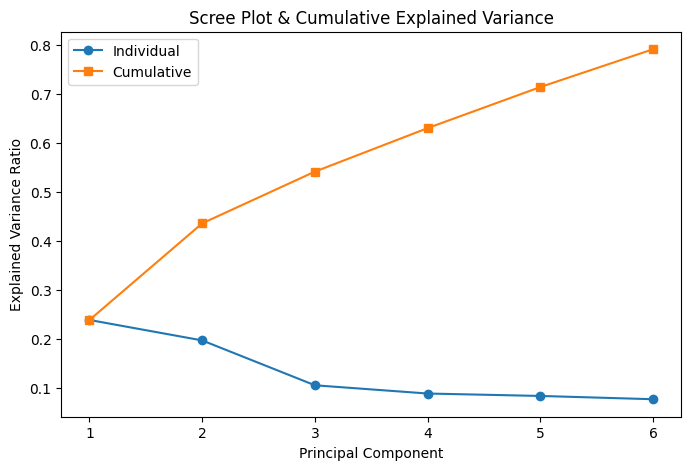

In [84]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_var) + 1), explained_var, marker='o')
plt.plot(range(1, len(cum_explained_var) + 1), cum_explained_var, marker='s')

plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot & Cumulative Explained Variance')
plt.legend(['Individual', 'Cumulative'])
plt.show()

In [85]:
X_train_final.head(7)

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6
2329,1.592734,0.193880,-0.265834,0.043208,-0.774810,-0.454755
394,1.294082,-0.620183,0.187011,0.460090,0.431597,0.903303
981,-0.810793,1.700656,0.482487,-0.301744,-0.711406,0.437708
1199,-1.134581,0.565418,-0.153661,-0.195495,-0.176196,-0.257848
3137,0.544572,0.621616,0.264044,-0.181519,0.300772,-0.742629
635,-1.155236,0.825359,0.512458,0.566908,0.302712,0.859438
1646,0.121038,-0.526258,0.412440,0.281481,-0.238426,-0.849288


In [86]:
X_val_final.head(7)

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6
2464,-0.551956,0.349403,0.406062,0.556555,0.224590,-0.173319
480,0.816349,-0.754260,0.126760,-0.406823,0.387607,0.806276
2368,-1.308618,-1.724936,0.144792,0.312695,0.026166,0.840469
3457,0.027414,0.472649,0.043703,-0.185758,0.652424,0.828494
503,-0.188673,0.394163,-1.017247,0.474484,-0.486177,-0.210808
2127,-0.612256,1.199083,0.251233,0.847994,0.415081,0.859449
986,-1.034503,-1.271465,-0.463347,-0.379039,-0.645536,0.667668


In [87]:
X_test_final.head(7)

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6
0,0.423001,1.689101,0.076979,0.463218,-0.544482,0.507462
1,0.466110,0.645864,-0.111593,0.496458,0.074524,-0.818476
2,-0.594963,-0.676781,-0.068097,0.264840,-0.534751,-0.836597
3,-0.399676,0.713422,-0.029975,0.797856,0.584030,-0.560565
4,1.617444,-1.031745,-0.467611,0.117142,-0.983416,0.535786
5,1.298034,0.295879,0.040451,-0.574480,0.632672,-0.802890
6,2.428397,0.112474,0.000137,-0.731816,0.756980,0.017224


In [88]:
y_val.head(7)

,jumlah_promosi
2464,2
480,2
2368,3
3457,3
503,5
2127,4
986,2


## **MODELING**

In [89]:
class VBNN:
    def __init__(self, k=3):
        """
        Inisialisasi Model VBNN.
        :param k: Jumlah tetangga terdekat yang ingin dicari (default=3).
        """
        self.k = k
        self.X_train = None
        self.y_train = None
        self.tri = None
        self.graph_neighbors = None
        self.classes_ = None

    def fit(self, X, y):
        """
        Langkah A: Konstruksi Delaunay & Graph Tetangga
        """
        # Pastikan input berupa numpy array
        self.X_train = np.array(X)
        
        # PERBAIKAN DISINI: Tambahkan .ravel() agar y jadi 1D array
        # Dari bentuk [[0], [1]] menjadi [0, 1]
        self.y_train = np.array(y).ravel() 
        
        self.classes_ = np.unique(self.y_train)
        
        # 1. Konstruksi Delaunay 
        self.tri = Delaunay(self.X_train)
        
        # 2. Konversi ke Graph Tetangga 
        self.graph_neighbors = self._build_graph(self.tri)
        
        return self

    def predict(self, X_test):
        """
        Melakukan prediksi untuk sekumpulan data uji.
        """
        X_test = np.array(X_test)
        predictions = []
        
        for i, query_point in enumerate(X_test):
            # Lakukan pencarian untuk setiap titik
            pred_label = self._predict_single(query_point)
            predictions.append(pred_label)
            
        return np.array(predictions)

    def _build_graph(self, tri):
        """
        Helper: Mengubah list segitiga menjadi Adjacency List (Buku Telepon)
        """
        neighbors = defaultdict(set)
        for simplex in tri.simplices:
            p1, p2, p3 = simplex[0], simplex[1], simplex[2]
            neighbors[p1].update([p2, p3])
            neighbors[p2].update([p1, p3])
            neighbors[p3].update([p1, p2])
        return neighbors

    def _predict_single(self, query):
        """
        Inti Algoritma VBNN: Greedy Search + Priority Queue Expansion
        """
        # --- Langkah B: Tentukan Titik Awal ---
        # Kita ambil sample acak atau fix di indeks 0 untuk start
        # (Bisa dioptimasi dengan spatial indexing sederhana, tapi ini cukup)
        current_best = 0 
        min_dist = np.linalg.norm(self.X_train[current_best] - query)
        
        # --- Langkah C & D: Greedy Search (Mencari 1-NN) ---
        # Delaunay Walk
        while True:
            found_better = False
            for neighbor in self.graph_neighbors[current_best]:
                d = np.linalg.norm(self.X_train[neighbor] - query)
                if d < min_dist:
                    min_dist = d
                    current_best = neighbor
                    found_better = True
            
            if not found_better:
                break # Konvergen di sel Voronoi terdekat
        
        nn_1 = current_best
        
        # --- Langkah E: Ekstensi k-NN (Priority Queue) ---
        if self.k == 1:
            return self.y_train[nn_1]
            
        pq = [] # Min-Heap untuk menyimpan kandidat (jarak, index)
        visited = {nn_1}
        
        # Masukkan 1-NN ke antrean
        heapq.heappush(pq, (min_dist, nn_1))
        
        # Masukkan tetangga-tetangga 1-NN ke antrean
        for neighbor in self.graph_neighbors[nn_1]:
            if neighbor not in visited:
                d = np.linalg.norm(self.X_train[neighbor] - query)
                heapq.heappush(pq, (d, neighbor))
                visited.add(neighbor)
        
        k_nearest_indices = []
        
        # Loop ekspansi sampai dapat k kandidat terbaik
        while len(k_nearest_indices) < self.k and pq:
            dist, node = heapq.heappop(pq)
            k_nearest_indices.append(node)
            
            # Cek tetangganya lagi (Expansion)
            for neighbor in self.graph_neighbors[node]:
                if neighbor not in visited:
                    d = np.linalg.norm(self.X_train[neighbor] - query)
                    heapq.heappush(pq, (d, neighbor))
                    visited.add(neighbor)
        
        # --- Langkah F: Klasifikasi (Majority Voting) ---
        k_nearest_labels = self.y_train[k_nearest_indices]
        
        # Hitung voting
        vote_counts = Counter(k_nearest_labels)
        
        # Tie-Breaking: Jika seri, most_common akan mengambil yang pertama muncul
        # Karena k_nearest_indices sudah urut jarak (terdekat duluan),
        # maka prioritas otomatis jatuh ke label yang punya perwakilan lebih dekat.
        final_prediction = vote_counts.most_common(1)[0][0]
        
        return final_prediction

    def visualize(self, max_points=100):
        """
        Visualisasi VBNN 2D Dual Graph
        """
        # 1. Cek Dimensi
        if self.X_train.shape[1] < 2:
            print("Error: Data butuh minimal 2 dimensi untuk visualisasi.")
            return

        print(f"Menyiapkan Visualisasi VBNN (Max {max_points} titik)...")
        
        # 2. SAMPLING (Stratified)
        if len(self.X_train) > max_points:
            _, X_sample, _, y_sample = train_test_split(
                self.X_train, 
                self.y_train, 
                test_size=max_points, 
                stratify=self.y_train, 
                random_state=42
            )
        else:
            X_sample = self.X_train
            y_sample = self.y_train

        # 3. AMBIL 2 FITUR UTAMA (PC1 & PC2)
        points_2d = X_sample[:, :2]

        # 4. HITUNG VORONOI & DELAUNAY (Di 2D)
        vor = Voronoi(points_2d)
        tri = Delaunay(points_2d) # Hitung Delaunay juga untuk plotting
        
        # 5. PLOTTING
        fig, ax = plt.subplots(figsize=(12, 8))

        # --- LAYER 1: GARIS VORONOI (Background - Putus-putus, Tipis) ---
        voronoi_plot_2d(vor, ax=ax, show_points=False, show_vertices=False, 
                        line_colors='#555555', # Abu-abu gelap
                        line_width=0.8, 
                        line_alpha=0.5, 
                        line_style='dashed') 

        # --- LAYER 2: GARIS DELAUNAY (Middle - Solid, Lebih Tebal) ---
        ax.triplot(points_2d[:, 0], points_2d[:, 1], tri.simplices, 
                   color='#AAAAFF', # Abu-abu terang kebiruan (kontras)
                   alpha=0.7, 
                   linewidth=1.5,
                   linestyle='-') 

        # --- LAYER 3: SCATTER PLOT (Titik Data - Paling Depan) ---
        scatter = ax.scatter(points_2d[:, 0], points_2d[:, 1], c=y_sample, 
                             cmap='viridis', edgecolor='k', s=70, zorder=10)
        
        # Finishing Touches
        plt.colorbar(scatter, label='Kelas')
        plt.title(f"Visualisasi VBNN (Sampel: {len(X_sample)} titik)")
        plt.xlabel("PC 1")
        plt.ylabel("PC 2")
        
        # Atur limit view
        margin = 0.5
        ax.set_xlim(points_2d[:,0].min() - margin, points_2d[:,0].max() + margin)
        ax.set_ylim(points_2d[:,1].min() - margin, points_2d[:,1].max() + margin)
        
        plt.grid(False)
        plt.show()

===== TRAINING MODEL VBNN =====
Waktu Training: 193.3536 detik

===== VISUALISASI DIAGRAM VORONOI/DELAUNAY =====
Menyiapkan Visualisasi VBNN (Max 50 titik)...


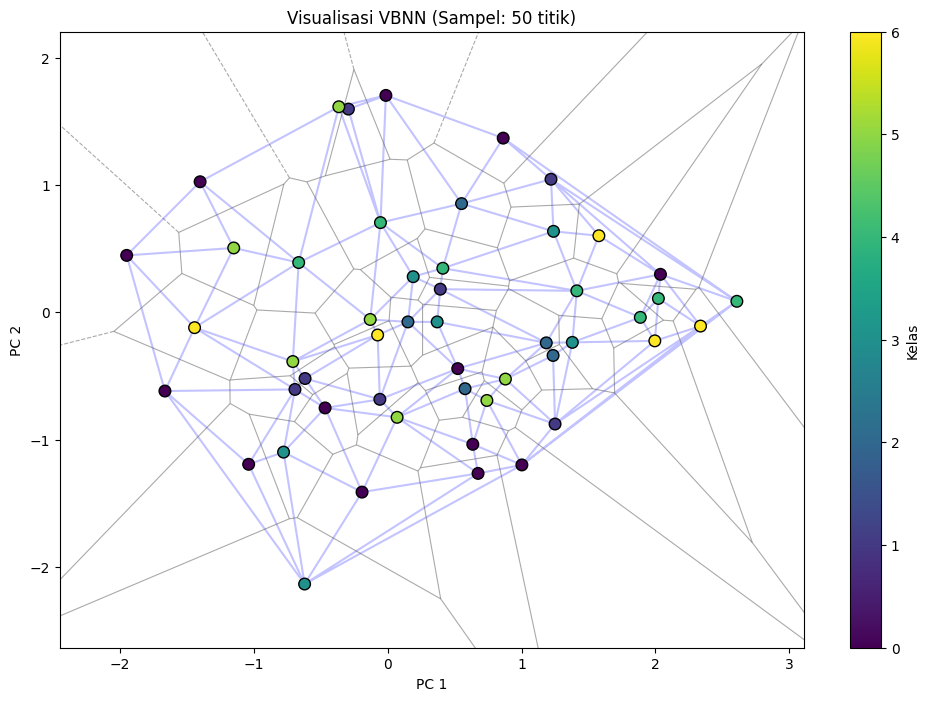

In [90]:
# 1. Inisialisasi Model (Coba k=5)
model = VBNN(k=3)

# 2. Training Phase
print("===== TRAINING MODEL VBNN =====")
start_train = time.time()

# .values digunakan karena X_train_final adalah DataFrame pandas
model.fit(X_train_final.values, y_train.values)

print(f"Waktu Training: {time.time() - start_train:.4f} detik")

# 3. Visualization Phase (Opsional - Cek struktur graf)
print("\n===== VISUALISASI DIAGRAM VORONOI/DELAUNAY =====")
model.visualize(max_points=50)

## **EVALUATION**

In [91]:
start_pred = time.time()
y_pred_vbnn = model.predict(X_val_final.values)
time_pred = time.time() - start_pred

f1_macro = f1_score(y_val.values, y_pred_vbnn, average="macro")
accuracy = accuracy_score(y_val.values, y_pred_vbnn)

print(f"Accuracy       : {accuracy * 100:.2f}%")
print(f"Macro F1 Score : {f1_macro * 100:.2f}%")
print(f"Waktu Prediksi : {time_pred:.4f} detik\n")

print("Classification Report:")
print(classification_report(y_val.values, y_pred_vbnn))

Accuracy       : 50.00%
Macro F1 Score : 48.36%
Waktu Prediksi : 5.0763 detik

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.44      0.48       197
           1       0.34      0.25      0.29       103
           2       0.27      0.28      0.28        78
           3       0.56      0.63      0.59        94
           4       0.58      0.64      0.61       103
           5       0.57      0.77      0.65       112
           6       0.50      0.47      0.48        77

    accuracy                           0.50       764
   macro avg       0.48      0.50      0.48       764
weighted avg       0.49      0.50      0.49       764



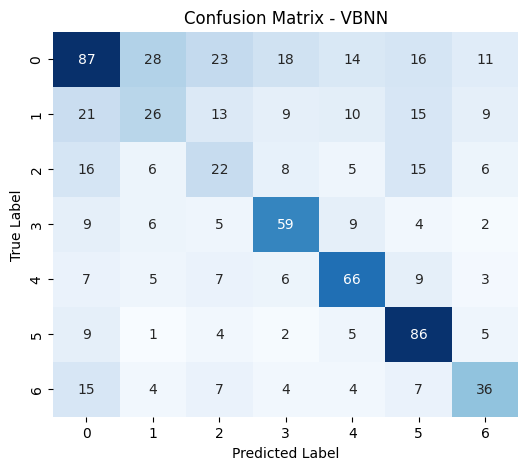

In [92]:
# Confusion Matrix
cm = confusion_matrix(y_val.values, y_pred_vbnn)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - VBNN")
plt.show()

In [93]:
# Cross-Validation 
cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

f1_scores = []
acc_scores = []
pred_times = []

print("\n===== Cross Validation VBNN =====")

# Loop CV
# enumerate(cv.split(X, y)) akan membagi index data
for fold, (train_idx, val_idx) in enumerate(cv.split(X_train_final, y_train), 1):
    # Ambil data berdasarkan index fold
    X_tr, X_va = X_train_final.values[train_idx], X_train_final.values[val_idx]
    y_tr, y_va = y_train.values[train_idx], y_train.values[val_idx]

    # Buat model baru tiap fold agar bersih
    model_cv = VBNN(k=5)
    model_cv.fit(X_tr, y_tr)

    start = time.time()
    y_pred = model_cv.predict(X_va)
    pred_time = time.time() - start

    f1 = f1_score(y_va, y_pred, average="macro")
    acc = accuracy_score(y_va, y_pred)

    # Simpan hasil
    f1_scores.append(f1)
    acc_scores.append(acc)
    pred_times.append(pred_time)

    # Tampilkan per fold
    print(
        f"Fold {fold:>2} | "
        f"Macro F1: {f1*100:6.2f}% | "
        f"Akurasi: {acc*100:6.2f}% | "
        f"Waktu Prediksi: {pred_time:.4f} detik"
    )

# Ringkasan Akhir
print("\n===== Ringkasan CV =====")
print(f"Macro F1 Mean    : {np.mean(f1_scores)*100:.2f}%")
print(f"Macro F1 Std     : {np.std(f1_scores)*100:.2f}%")
print(f"Akurasi Mean     : {np.mean(acc_scores)*100:.2f}%")
print(f"Akurasi Std      : {np.std(acc_scores)*100:.2f}%")
print(f"Avg Predict Time : {np.mean(pred_times):.4f} detik")


===== Cross Validation VBNN =====
Fold  1 | Macro F1:  37.85% | Akurasi:  40.26% | Waktu Prediksi: 0.6211 detik
Fold  2 | Macro F1:  44.94% | Akurasi:  46.81% | Waktu Prediksi: 4.0332 detik
Fold  3 | Macro F1:  42.19% | Akurasi:  45.99% | Waktu Prediksi: 3.9241 detik
Fold  4 | Macro F1:  42.49% | Akurasi:  44.75% | Waktu Prediksi: 0.9584 detik
Fold  5 | Macro F1:   3.13% | Akurasi:  12.30% | Waktu Prediksi: 0.0030 detik

===== Ringkasan CV =====
Macro F1 Mean    : 34.12%
Macro F1 Std     : 15.66%
Akurasi Mean     : 38.02%
Akurasi Std      : 13.06%
Avg Predict Time : 1.9080 detik
